## Step 1: Data Loading

In [1]:
import kagglehub
import pandas as pd

# Fetch dataset dynamically
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")
print("Path to dataset files:", path)

# Load the dataset
dataset_file = f"{path}/amazon.csv"
dataset = pd.read_csv(dataset_file)

# Display basic dataset info
print("Dataset Info:")
print(dataset.info())
print("\nFirst Few Rows:")
print(dataset.head())


100%|██████████| 1.95M/1.95M [00:00<00:00, 31.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   o

## STEP 2 : Data Cleaning

In [2]:
# Clean and convert pricing columns
dataset['discounted_price'] = dataset['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
dataset['actual_price'] = dataset['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%', '').astype(float)
dataset['rating'] = pd.to_numeric(dataset['rating'], errors='coerce')

# Drop rows with missing data
cleaned_dataset = dataset.dropna(subset=['discounted_price', 'actual_price', 'discount_percentage', 'rating'])


## Step 3: Pricing and Sentiment Analysis

In [3]:
from textblob import TextBlob

# Add sentiment column
def get_sentiment(review):
    analysis = TextBlob(review)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative'

cleaned_dataset['sentiment'] = cleaned_dataset['review_content'].apply(get_sentiment)

# Aggregate sentiment insights
sentiment_insights = cleaned_dataset.groupby('sentiment').agg({
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'sum'
}).reset_index()

print("\nSentiment-Based Insights:")
print(sentiment_insights)



Sentiment-Based Insights:
  sentiment  discount_percentage    rating  \
0  Negative            42.037037  3.929630   
1  Positive            47.819763  4.099722   

                                        rating_count  
0  16,2991,38316,299125766161232406443,06616,2992...  
1  24,26943,9947,92894,36316,90524,87115,18830,41...  


<ipython-input-3-69196aec4da2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['sentiment'] = cleaned_dataset['review_content'].apply(get_sentiment)


## Step 4: Visualizations
Sentiment Distribution:

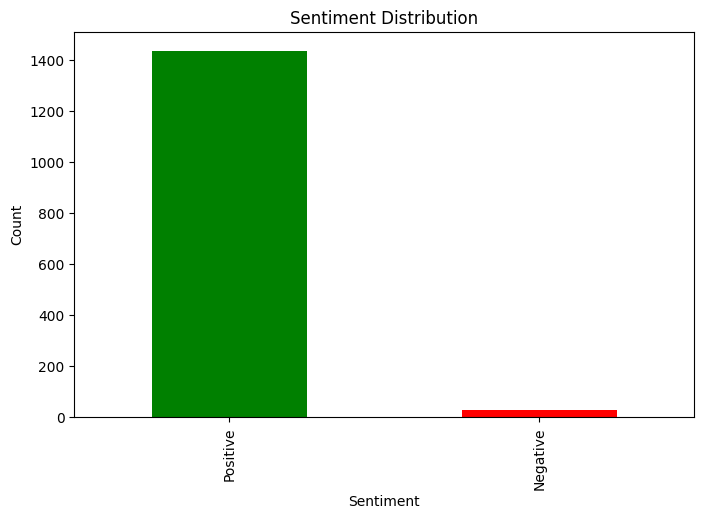

In [4]:
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = cleaned_dataset['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()


Word Cloud for Positive Reviews:

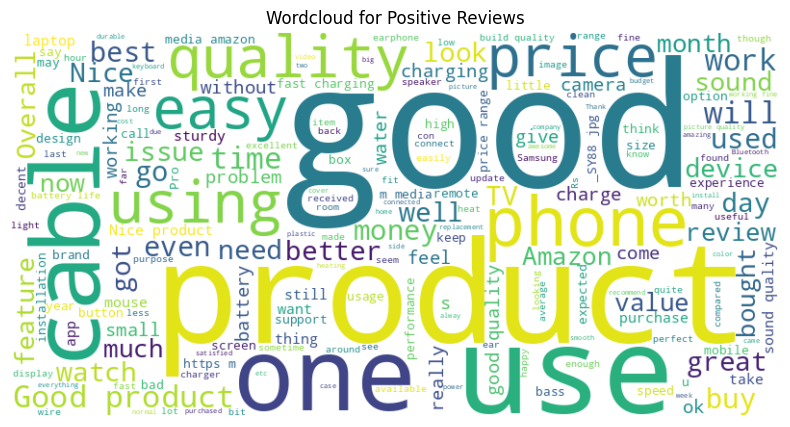

In [5]:
from wordcloud import WordCloud

positive_reviews = ' '.join(cleaned_dataset[cleaned_dataset['sentiment'] == 'Positive']['review_content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Positive Reviews')
plt.show()


Correlation Between Pricing and Ratings:

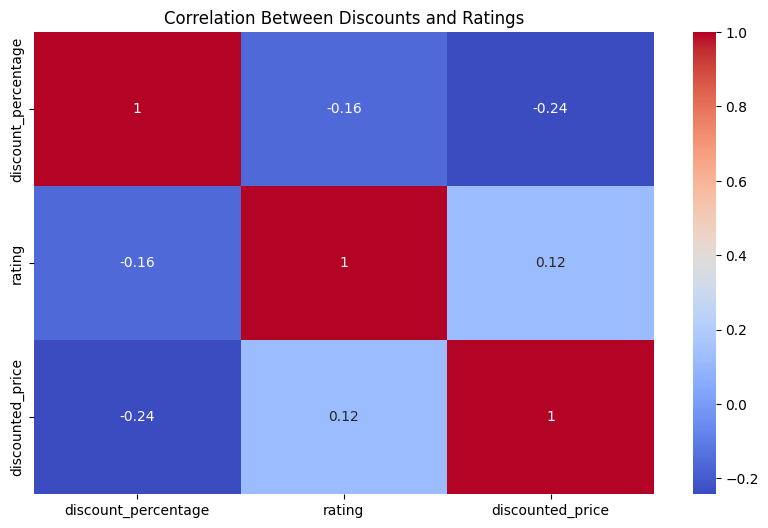

In [6]:
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_dataset[['discount_percentage', 'rating', 'discounted_price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Discounts and Ratings')
plt.show()


In [7]:
# Combine sentiment with discount and ratings
sentiment_insights = cleaned_dataset.groupby('sentiment').agg({
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'sum'
}).reset_index()

print("\nSentiment-Based Insights:")
print(sentiment_insights)

# Category-wise sentiment distribution
category_sentiment = cleaned_dataset.groupby(['category', 'sentiment']).size().unstack().fillna(0)
print("\nCategory-Wise Sentiment Distribution:")
print(category_sentiment)



Sentiment-Based Insights:
  sentiment  discount_percentage    rating  \
0  Negative            42.037037  3.929630   
1  Positive            47.819763  4.099722   

                                        rating_count  
0  16,2991,38316,299125766161232406443,06616,2992...  
1  24,26943,9947,92894,36316,90524,87115,18830,41...  

Category-Wise Sentiment Distribution:
sentiment                                           Negative  Positive
category                                                              
Car&Motorbike|CarAccessories|InteriorAccessorie...       0.0       1.0
Computers&Accessories|Accessories&Peripherals|A...       0.0       2.0
Computers&Accessories|Accessories&Peripherals|A...       0.0       1.0
Computers&Accessories|Accessories&Peripherals|A...       0.0       2.0
Computers&Accessories|Accessories&Peripherals|A...       0.0       2.0
...                                                      ...       ...
OfficeProducts|OfficePaperProducts|Paper|Statio...       0.0  

<ipython-input-8-b73988c82314>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='discount_percentage', data=sentiment_insights, palette='viridis')


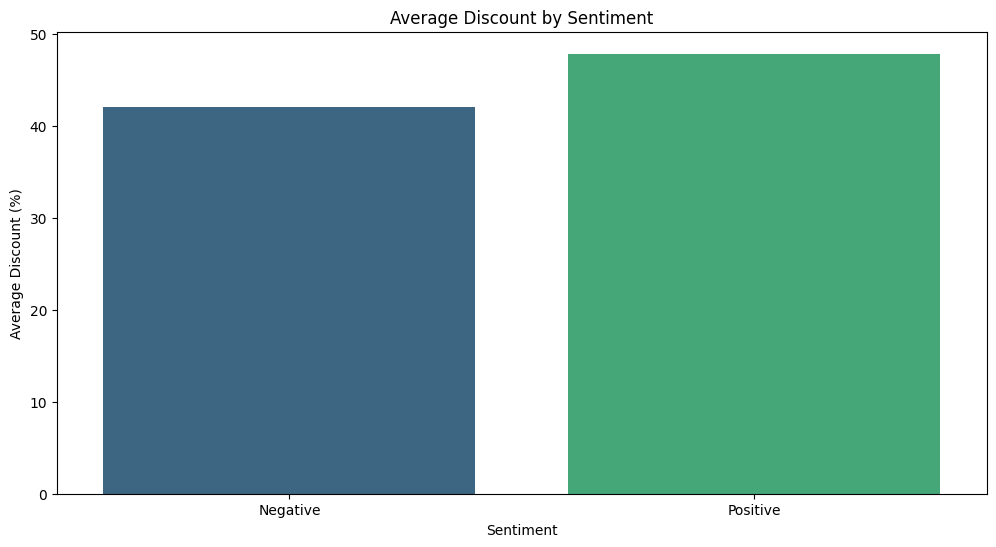

<ipython-input-8-b73988c82314>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='rating', data=sentiment_insights, palette='magma')


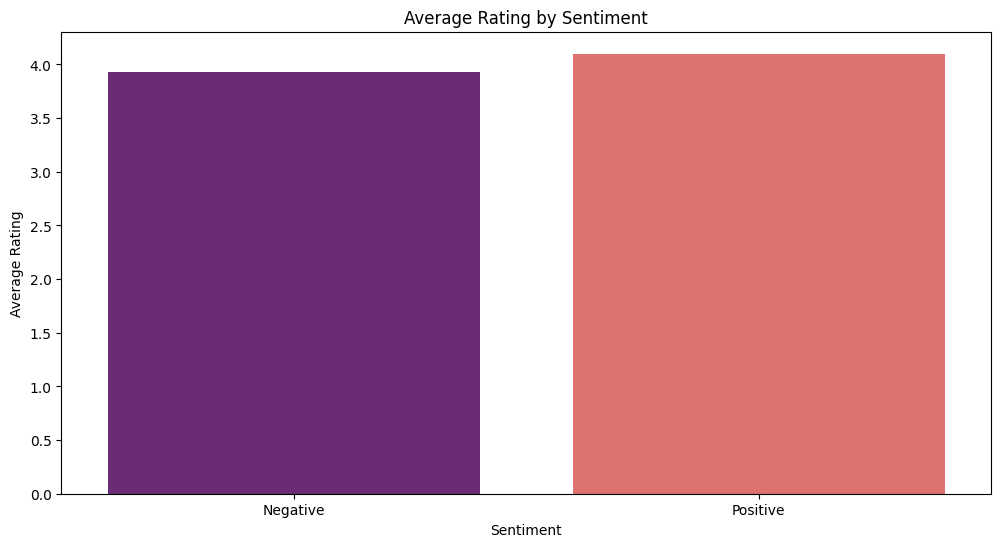

In [8]:
# Bar plot for sentiment-based metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='discount_percentage', data=sentiment_insights, palette='viridis')
plt.title('Average Discount by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Discount (%)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment', y='rating', data=sentiment_insights, palette='magma')
plt.title('Average Rating by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()


<Figure size 2000x1000 with 0 Axes>

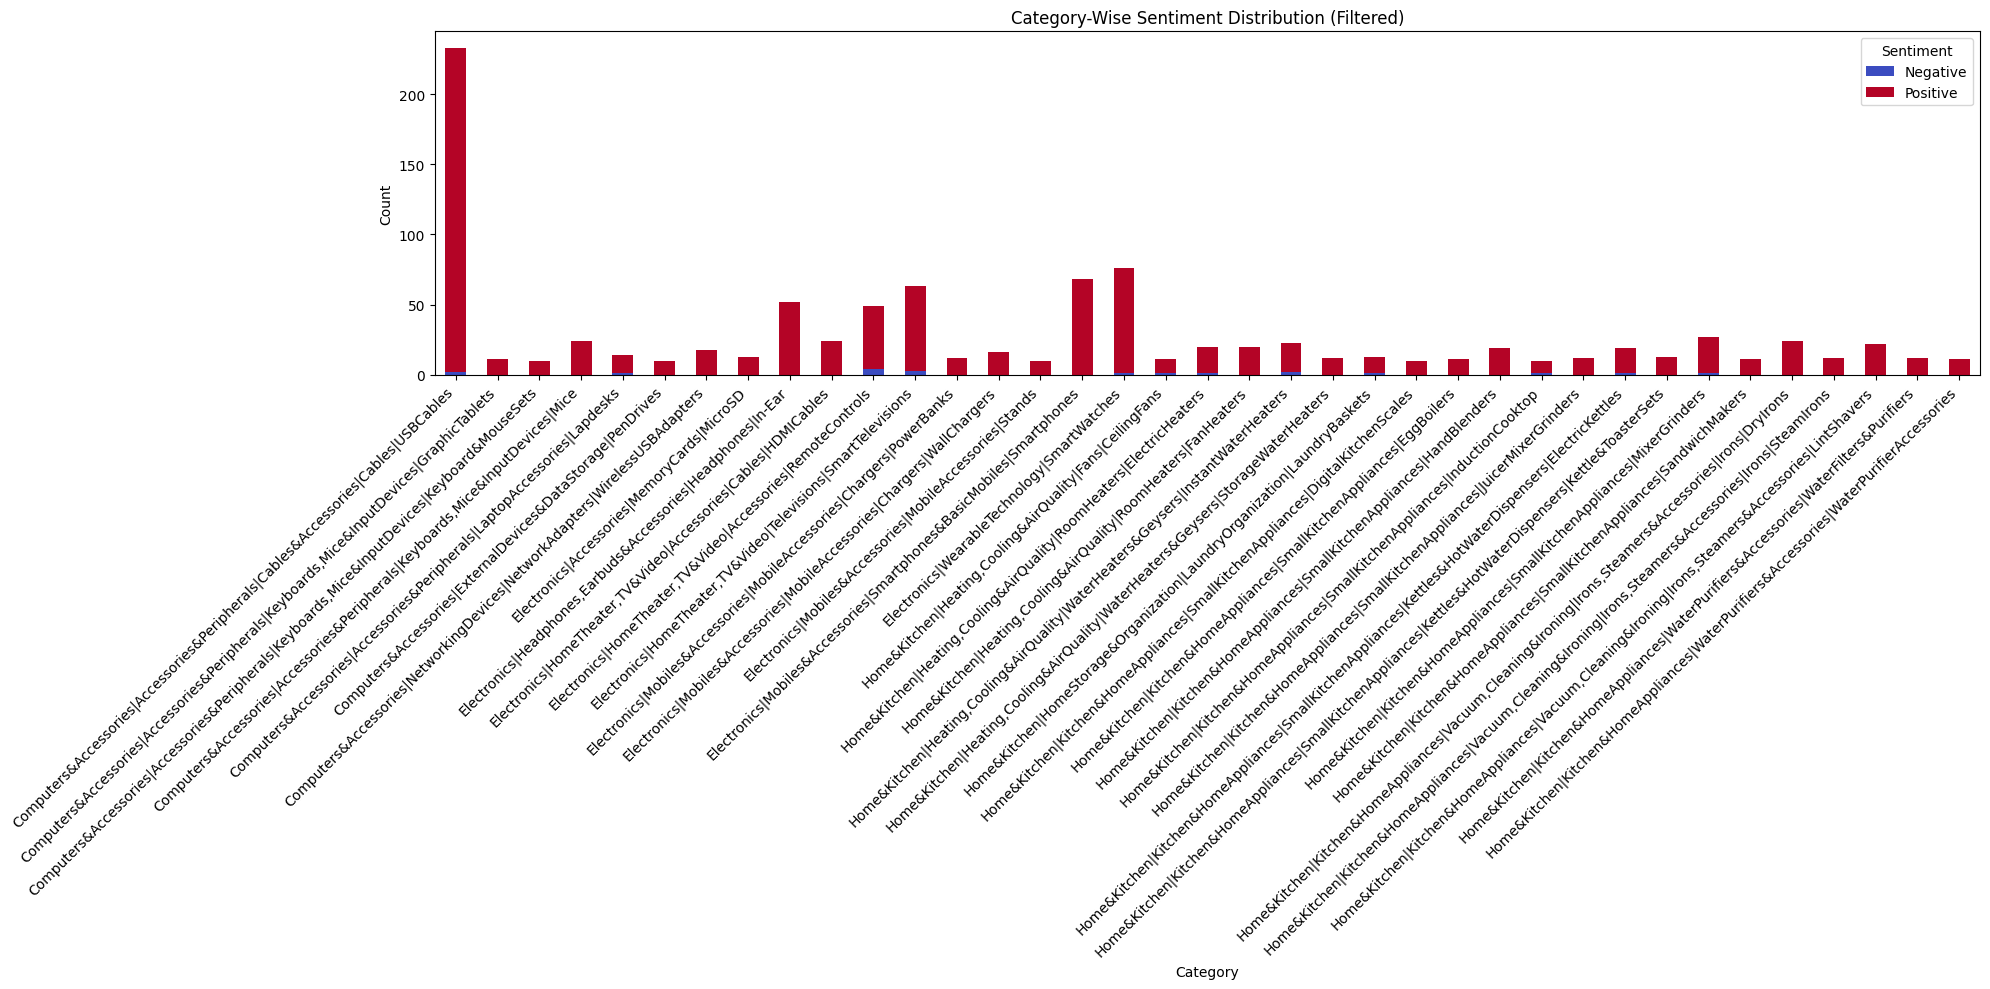

In [10]:
# Filter categories with at least 10 reviews (adjust threshold as needed)
category_sentiment_filtered = category_sentiment[category_sentiment.sum(axis=1) >= 10]

# Plot the filtered category-wise sentiment distribution
plt.figure(figsize=(20, 10))
category_sentiment_filtered.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    colormap='coolwarm'
)
plt.title('Category-Wise Sentiment Distribution (Filtered)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
